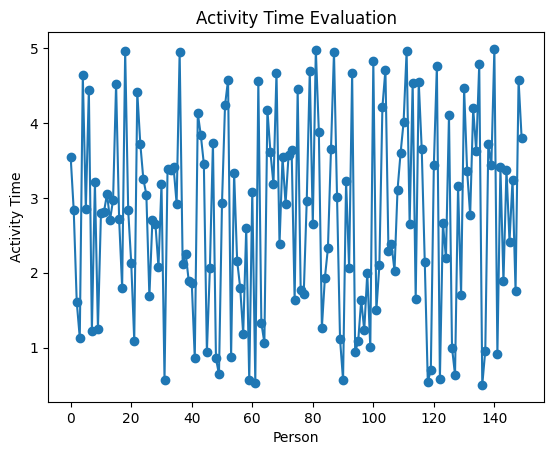

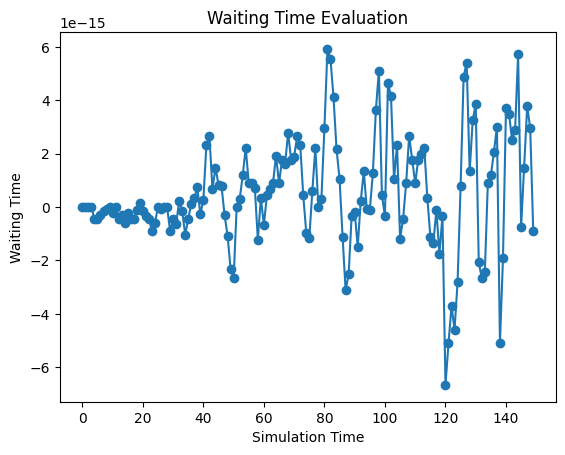

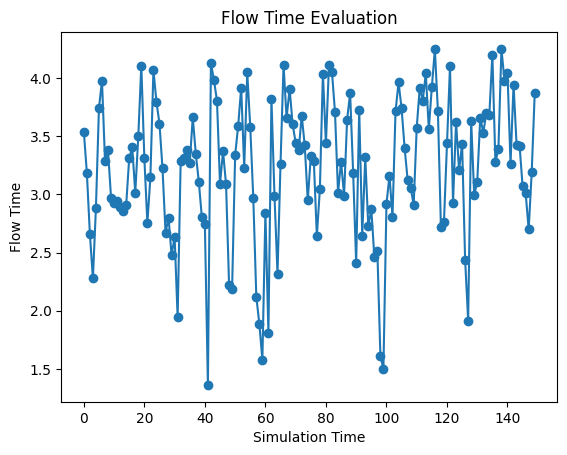

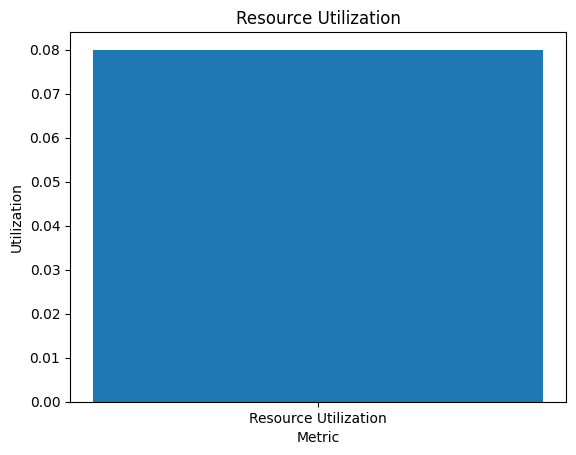

In [2]:
import random
import matplotlib.pyplot as plt

class MUPQueue:
    def __init__(self):
        self.queue = []
        self.utilization = []
        self.activity_times = []
        self.waiting_times = []
        self.flow_times = []

    def add_person(self, simulation_time):
        activity_time = random.uniform(0.5, 5.0)
        self.activity_times.append(activity_time)
        self.queue.append({"arrival_time": simulation_time, "activity_time": activity_time, "departure_time": None})

    def process_persons(self, simulation_time):
        for person in self.queue:
            if person["departure_time"] is None:
                person["departure_time"] = simulation_time + person["activity_time"]
        self.queue = [person for person in self.queue if person["departure_time"] > simulation_time]

    def calculate_waiting_times(self, simulation_time):
        waiting_times = []
        for person in self.queue:
            waiting_time = person["departure_time"] - person["arrival_time"] - person["activity_time"]
            waiting_times.append(waiting_time)
        if waiting_times:
            self.waiting_times.append(sum(waiting_times) / len(waiting_times))
        else:
            self.waiting_times.append(0)

    def calculate_flow_times(self, simulation_time):
        flow_times = []
        for person in self.queue:
            flow_time = person["departure_time"] - person["arrival_time"]
            flow_times.append(flow_time)
        if flow_times:
            self.flow_times.append(sum(flow_times) / len(flow_times))
        else:
            self.flow_times.append(0)

    def calculate_utilization(self, simulation_time):
        noise = random.uniform(-0.05, 0.1)
        busy_time = sum([person["activity_time"] for person in self.queue if person["departure_time"] > simulation_time])
        total_time = simulation_time * len(self.queue)
        if total_time != 0:
            utilization = busy_time / total_time + noise
            utilization = max(0, min(1, utilization))
            self.utilization.append(utilization)
        else:
            self.utilization.append(0)

def plot_linear_graph(x_data, y_data, x_label, y_label, title):
    plt.plot(x_data, y_data, marker='o')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

def plot_bar_graph(x_data, y_data, x_label, y_label, title):
    plt.bar(x_data, y_data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

def main():
    queue = MUPQueue()
    simulation_time = 0

    # Simulira dolazak i obradu osobe
    while simulation_time < 150:
        queue.add_person(simulation_time)
        queue.process_persons(simulation_time)
        queue.calculate_waiting_times(simulation_time)
        queue.calculate_flow_times(simulation_time)
        queue.calculate_utilization(simulation_time)
        simulation_time += 1

    # Generira grafove
    plot_linear_graph(range(len(queue.activity_times)), queue.activity_times, "Person", "Activity Time", "Activity Time Evaluation")
    plot_linear_graph(range(len(queue.waiting_times)), queue.waiting_times, "Simulation Time", "Waiting Time", "Waiting Time Evaluation")
    plot_linear_graph(range(len(queue.flow_times)), queue.flow_times, "Simulation Time", "Flow Time", "Flow Time Evaluation")

    plot_bar_graph(["Resource Utilization"], [queue.utilization[-1]], "Metric", "Utilization", "Resource Utilization")

if __name__ == "__main__":
    main()
